In [1]:
from evaluation.core import BaseStrategy,State
from evaluation.constants import BUY_ACTION,SELL_ACTION,HOLD_ACTION,MAX_TRADES_PER_TIMESTAMP
from evaluation.backTest import BackTest
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random 

In [2]:
"""
Abount state function
The state function stores the current portfolio, and provides useful APIs to update and look at the state
The state is made for a single stock !!!!
"""

# to create the state object we need to pass the commision parameter to it 
# the commision is in percentage
state = State(commision= .1)

# update method changes the state
# we input the current closing price and the action we want to do
money, is_trade_complete = state.update(closing_price= 100, action= BUY_ACTION)
# it returns the total cost for the action and whether the trade is complete (is_trade_complete is for internal use)
print(money) # here money is the total cost of buying the stock at price 100 after adding commision


money,is_trade_complete = state.update(closing_price= 150, action= SELL_ACTION)
print(money) # in this case we get 150 rupees after selling the stock and then substract the commision

-100.1
149.85


In [3]:
"""
Most importantly the state has an array called value
This array contains prices of stocks bought in reverse sorted manner

We only have to use this value array when interfacing our Strategy with the evaluation 
"""
state = State(commision= .1)
state.update(closing_price= 100, action= BUY_ACTION)
state.update(closing_price= 120, action= BUY_ACTION)
state.update(closing_price= 10, action= BUY_ACTION)
print(state.values)

# when we sell it will automatically select the lowest prices stock to sell
state.update(closing_price=1000, action= SELL_ACTION)
print(state.values)


[120, 100, 10]
[120, 100]


In [4]:
"""
Shorting is also allowed in state
"""

state = State(commision= .1, short= True)

money,is_trade_complete = state.update(closing_price= 100, action= SELL_ACTION)

print(money,is_trade_complete)
print(state.values)

99.9 False
[-100]


In [5]:
"""
Create Stratergy, the strategy need you to implement one method called step

Inputs to step function
data  -  is the pandas dataframe we just read,
state -  stores your current portfolio in the value array
current_pointer  - is the current index in the data ( the current trade )

Using this information decide whether to buy sell or hold

"""

class RandomSingleStrategy(BaseStrategy):

    def step(self, data : pd.DataFrame, state: State, current_pointer: int):
        if state.isHolding(): 
            if random.random() > .5:
                return SELL_ACTION
            else:
                return HOLD_ACTION
        else:
            if random.random() > .8:
                return BUY_ACTION
            else:
                return HOLD_ACTION

        
        

In [6]:
"""
Now creating out strategy
Read the dataframe
"""

df= pd.read_csv("data/day/APOLLOHOSP.csv")

In [7]:
test = BackTest(data= df, short= False, mode= "single", commision= .1,strategy= RandomSingleStrategy(), initial_cash= 100000)

In [8]:
test.runStrategy()

Ran from 2010-01-04 00:00:00 to 2024-05-31 00:00:00
Initial value = 100000
Final value = 100498.91569999991


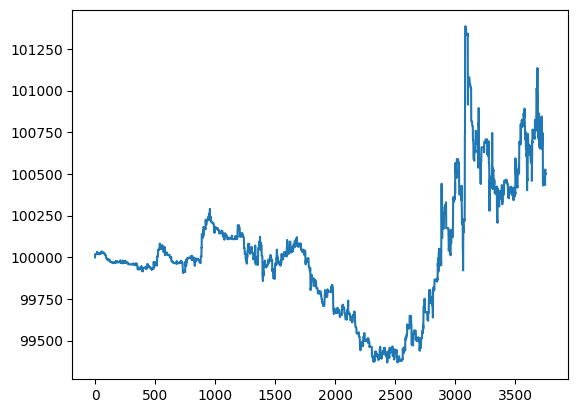

In [9]:
test.plotValue()